# Can you really make it as a full-time streamer on Twitch?
## By: Nick Lawrence

### Introduction

The video game industry has certainly blown up in the last decade. From something that was once just a hobby for friends, is now a multi-billion dollar industry, where people of all backgrounds can come and enjoy one thing together; playing video games.

Twitch is a live streaming service that focuses on video games, but has expanded to other categories in the recent years. It was introduced in June 2011 as a spin-off of the general-interest streaming platform Justin.tv. Content on the site can be viewed either live or via video on demand. On October 6th, 2021, Twitch had a [data breach](https://www.zdnet.com/article/twitch-downplays-massive-breach-says-no-passwords-or-login-credentials-leaked/#:~:text=An%20unknown%20hacker%20leaked%20the,internal%20cybersecurity%20red%20teaming%20tools.), where an unknown hacker leaked the entirety of Twitch's source code. Today, we are going to analyze the income released for some of the top streamers on the platform.

To handle the size of the dataset, we are only going to be analyzing the incomes for the 2020 year. It is important to note that this data is only limited to payments made to streamers by Twitch. This does not include donations, or sponsorships that top streamers often recieve. These are often a large portion of their true total revenue, so these numbers below will fall short of how much they actually make for the entire year.

## Data curation, parsing, and management

In [1]:
import pandas as pd
import glob
path =r'/home/jovyan/notebooks/input'
files = glob.glob(path + '/*')
df_list=[]
delete = []
req_cols = ['user_id', 'ad_share_gross', 'sub_share_gross', 'bits_share_gross','bits_developer_share_gross','bits_extension_share_gross','prime_sub_share_gross','bit_share_ad_gross','report_date']
for f in files:
    out = pd.read_csv(f, usecols= req_cols, dtype={'report_date' : str})
    out = out.astype({'bit_share_ad_gross' : 'float16', 'ad_share_gross' : 'float32', 'sub_share_gross' : 'float32', 'bits_share_gross' : 'float32', 'bits_developer_share_gross' : 'float32', 'bits_extension_share_gross' : 'float32', 'prime_sub_share_gross' : 'float32'})
    col_list = list(out)
    col_list.remove('user_id')
    col_list.remove('report_date')
    col_list.remove('bit_share_ad_gross')
    out['total'] = out[col_list].sum(axis=1)
    
    for row in out.itertuples():
        if row.total < 0.0:
            delete.append(row.Index)
    out.drop(index=delete, inplace=True)
    delete = []
    df_list.append(out)
out = pd.concat(df_list)
out['runningtotal'] = out['total'].groupby(out['user_id']).transform('sum')
out.dropna(inplace=True)
out.head()

user_id  ad_share_gross  sub_share_gross  bits_share_gross  \
0   89913875            0.67        58.450001              1.00   
1  176368393            0.19        19.549999              8.05   
2  105241070            1.08         8.820000              0.00   
3   37437012            4.17        62.369999              1.31   
4   86231322            0.20         0.000000              0.00   

   bits_developer_share_gross  bits_extension_share_gross  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   prime_sub_share_gross  bit_share_ad_gross report_date      total  \
0                  12.47                 0.0   02/1/2020  72.589996   
1                   0.00                 0.0   02/1/2020  27.790001   
2                   4.99                 0.0   02/1/2020  14.889999   
3                   7.49                 0.0   02/1/2020  75.339996   
4                   2.50                 0.0   02/1/2020   2.700000   

   runningtotal  
0    650.460022  
1    115.760002  
2    131.039993  
3   1119.229980  
4     26.530001

As seen above, I needed to remove entries that made a negative amount of revenue within one month of 2020. Since this data is not explicitly explained by Twitch (as it was leaked) I cannot explain the reasoning behind a streamer having a negative total for a singular month. I also calculated the running total for the entire year for each streamer, so that we understand how much one streamer made both monthly and annually. Also, to help save memory, I restricted columns of my new dataframe to selected types, as by default sometimes they would consist of types that take up more space than needed.

Since they're are many ways for streamers to produce income on Twitch's platform, let's analyze the difference in income for each of the different ways. To do so, I plotted the different methods of revenue seen above within a pie chart using matplotlib.

## Exploratory data, analysis

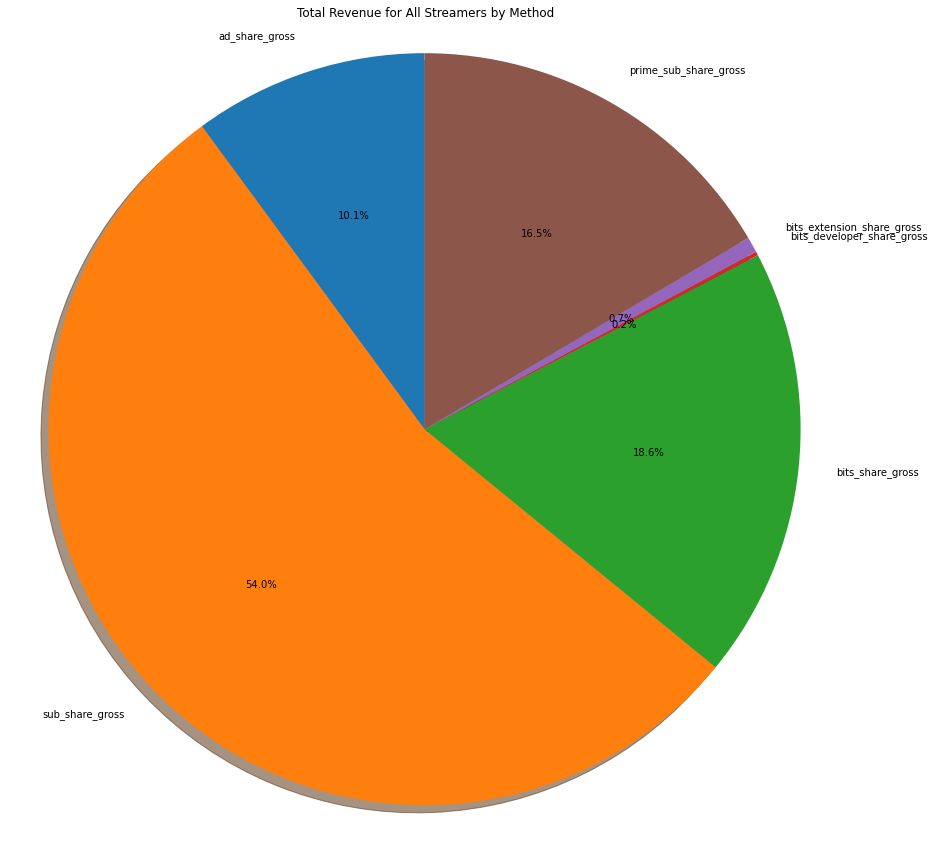

In [2]:
import matplotlib.pyplot as plt
totals = []
for x in col_list:
    totals.append(out[x].sum())
plt.figure(figsize=(15,15))
plt.pie(totals, labels=col_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Revenue for All Streamers by Method')
plt.show()

In the above picture, it is very clear as to how streamers make majority of their income. To quickly explain each piece of the pie chart:

- [sub_share_gross](https://www.twitch.tv/creatorcamp/en/get-rewarded/bits-and-subscriptions/#:~:text=A%20Subscription%20allows%20a%20viewer,other%20benefits%20you%20can%20define.) = Money made from viewers subscribing to the streamer's channel. There are a few [tiers](https://www.streamscheme.com/complete-guide-to-twitch-subscriptions/).
- [bits_share_gross](https://www.twitch.tv/bits) = Bits are similar to small tips. 
- [prime_sub_share_gross](https://gaming.amazon.com/intro) = Amazon Prime users get one free subscription to their favorite streamer every month. Otherwise, it is the same as a regular subscription.
- ad_share_gross = Revenue made from presenting advertisements on the stream.
- [bits_extension_share_gross](https://dev.twitch.tv/docs/extensions/monetization#:~:text=Bits%20in%20Extensions%20enables%20developers,viewer%27s%20account%20contains%20enough%20Bits.) = Revenue made from bits that are through the Twitch extension.
- [bits_developer_share_gross](https://dev.twitch.tv/docs/extensions/monetization#:~:text=Bits%20in%20Extensions%20enables%20developers,viewer%27s%20account%20contains%20enough%20Bits.) = Revenue made from bits through the developer extension.

Over 50% of all streamer's revenue from Twitch was solely through subs. This is expected as Twitch subs are really the main way of supporting your favorite streamer. To my surprise, bits are actually the second largest percentage of streamer's revenue. I would have thought it would be prime subs, as I was under the impression that a lot of users have Amazon Prime, which grants them also a free subscription. Following bits and prime subs, are advertisements at around 10%. Streamers can play ads for a few minutes during the stream, to generate additional revenue.

Now that we have analyzed the different methods that streamers produce revenue, let's now take a glance at the average revenue for a Twitch streamer throughout 2020 for each month.

Linear Regression Model: 0.7516174183025233x + 47.78214303041115


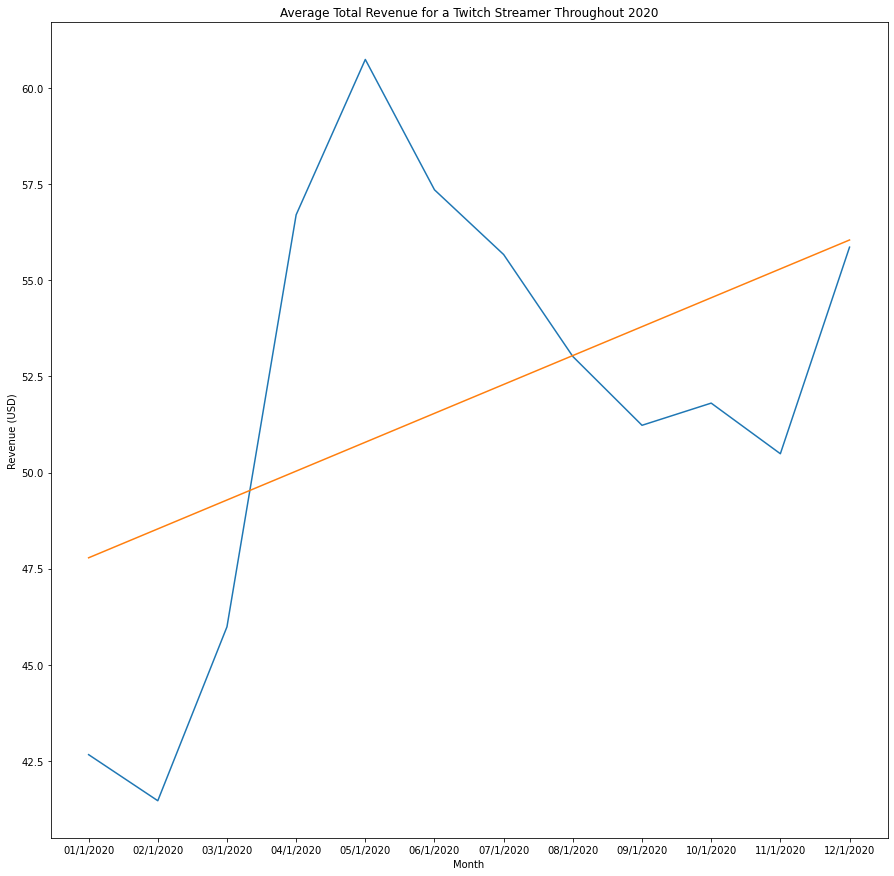

In [3]:
import numpy as np
sorts = out.sort_values('report_date')
sort = sorts.groupby('report_date')
months = []
averages = []
plt.figure(figsize=(15,15))
for name, group in sort:
    months.append(name)
    averages.append(group.total.mean())
plt.plot(months,averages)
m,b=np.polyfit(range(12),averages,1)
print('Linear Regression Model: %sx + %s' % (m, b))
regress = [m*val+b for val in range(12)]
plt.plot(months,regress)
plt.title('Average Total Revenue for a Twitch Streamer Throughout 2020')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)');

2020 was a memorable year for the world. Going through the [COVID-19](https://www.cdc.gov/coronavirus/2019-ncov/index.html) pandemic, many people lost their lives to the illness, the economy tanked, and thousands lost their jobs. But, with the emergence of everyone functioning remotely, I believe Twitch streamers did not seem so unfortunate. If anything, it appears that streamers grew throughout 2020, as we see an increase in the average income for a Twitch streamer. Now I'm sure people are wondering, who would ever do something that pays only $60 a month at best? While the average streamer will not be making much of a living, I'd like to pull our attention to those that have grown to the top. Let's take a look at the top 20 streamers for 2020, just to have a taste of what kind of money some of these streamers really make. I will plot the revenue they made each month, as well as their total for the entire year.

In [4]:
sorts = out.sort_values('runningtotal', ascending=False)

Text(0, 0.5, 'Revenue (USD)')

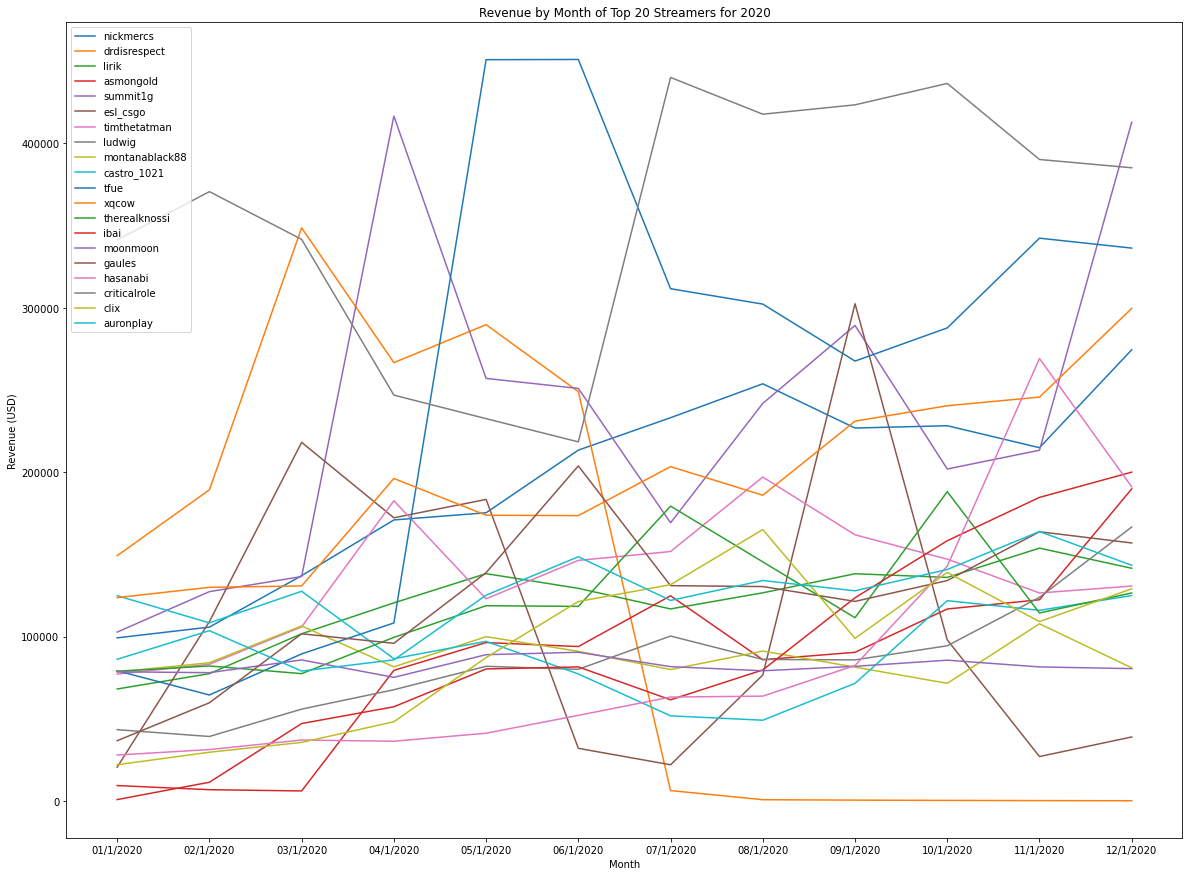

In [5]:
import requests
import re
import json
names = []

top20 = sorts.head(240)
grouped = top20.groupby('user_id')
plt.figure(figsize=(20,15))
for ids, group in grouped:
    response = requests.get('https://api.ivr.fi/twitch/resolve/%s?id=true' % ids)
    sortgroup = group.sort_values('report_date')
    try:
        plt.plot(sortgroup.report_date, sortgroup.total, label=response.json()['login'])
    except KeyError:
        plt.plot(sortgroup.report_date, sortgroup.total, label=ids)
plt.legend(loc='best')
plt.title('Revenue by Month of Top 20 Streamers for 2020')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')

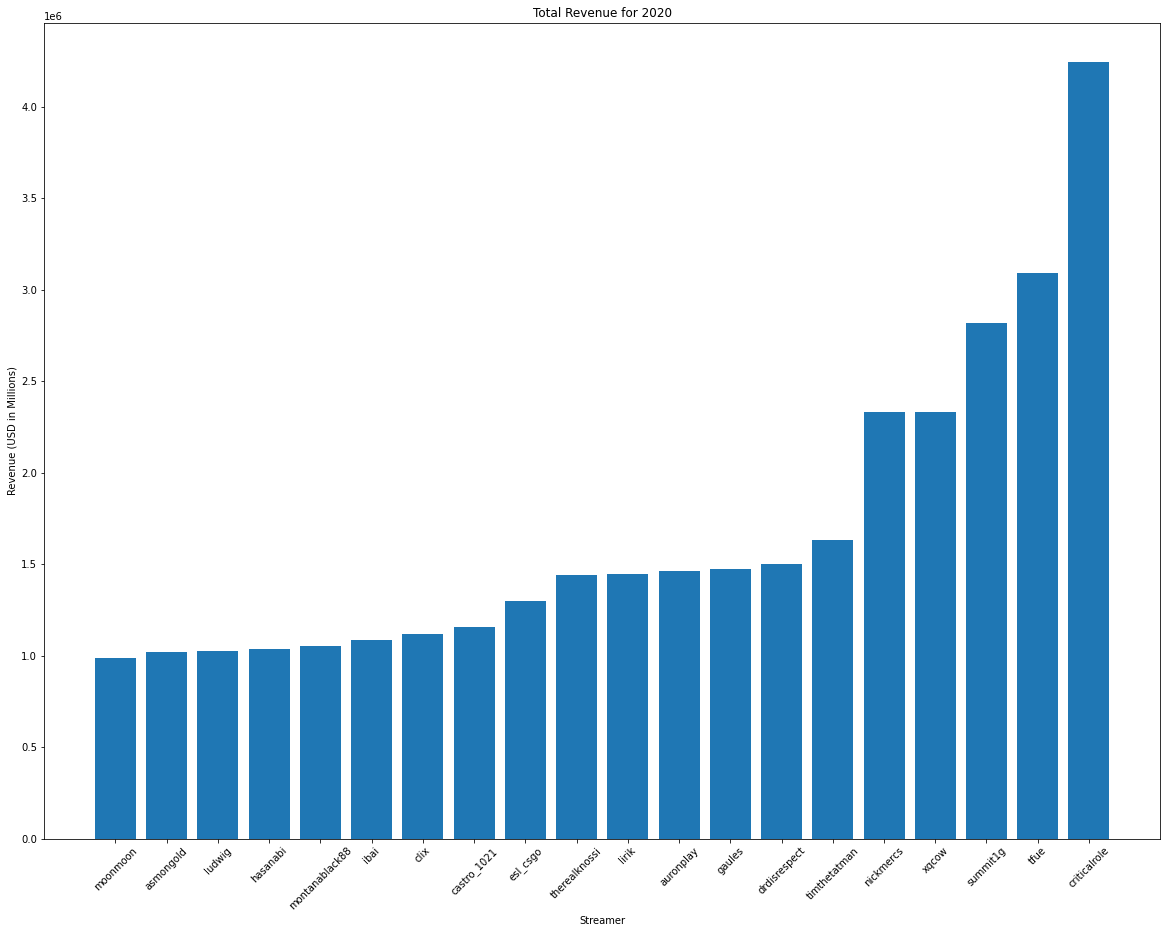

In [6]:
grouped = top20.groupby('runningtotal')
names = []
totals = []
plt.figure(figsize=(20,15))
for total, group in grouped:
    group2=group.groupby('user_id')
    for name, data in group2:
        response = requests.get('https://api.ivr.fi/twitch/resolve/%s?id=true' % name)
    totals.append(total)
    try:
        names.append(response.json()['login'])
    except KeyError:
        names.append('')   
plt.bar(names, totals)
plt.xticks(rotation = 45)
plt.title('Total Revenue for 2020')
plt.xlabel('Streamer')
plt.ylabel('Revenue (USD in Millions)');

Here is the 2020 year for the top 20 streamers on Twitch (based on total income). The first graph shows the their income by month, while the second one is showing the grand total for the year.

Clearly, in comparison to the average income for all Twitch streamers, our top 20 make an absurd amount. We see upwards as much as 4 million USD for the entire year of 2020. For some, this is quite the incentive to try and be a successful streamer, with such a high pay ceiling (if there is one, really). Bringing in over $200,000 a month would be a dream for many. Again, since this is much of an extremity, let's take things down a notch and look at a random sample of streamers on Twitch, to analyze the disparity in revenues.

<BarContainer object of 5 artists>

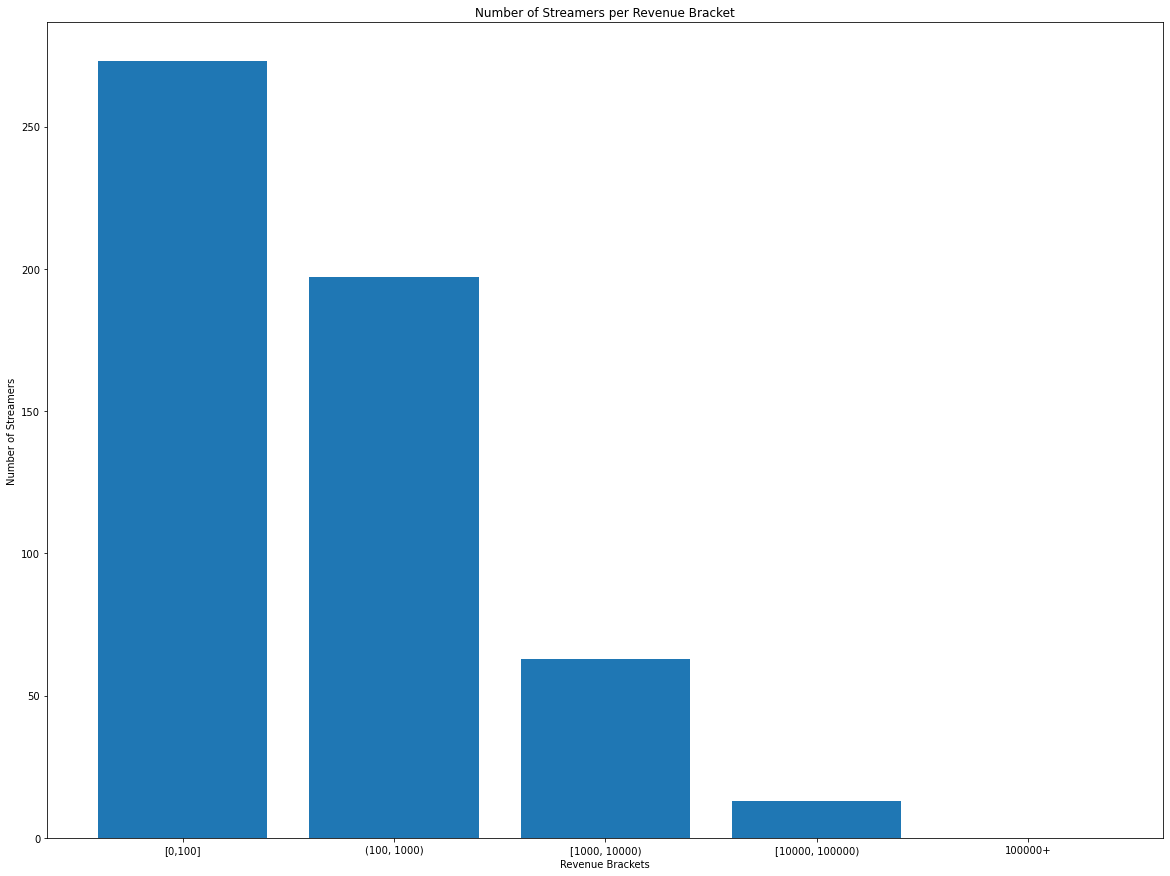

In [7]:
sampled = out.sample(1000)
names = ['[0,100]', '(100, 1000)', '[1000, 10000)', '[10000, 100000)', '100000+']
to100 = 0
to1000 = 0
to10000 = 0
to100000 = 0
more = 0
for x in sampled.runningtotal:
    if (x >= 100):
        to100 = to100 + 1
    if (x > 100 and x < 1000):
        to1000 = to1000 + 1
    if (x >= 1000 and x < 10000):
        to10000 = to10000 + 1
    if (x >= 10000 and x < 100000):
        to100000 = to100000 + 1
    if (x >= 100000):
        more = more + 1
plt.figure(figsize=(20,15))
plt.title('Number of Streamers per Revenue Bracket')
plt.xlabel('Revenue Brackets')
plt.ylabel('Number of Streamers');

plt.bar(names, [to100,to1000,to10000,to100000,more])

To help illustrate the disparity between revenue more clearly, I created revenue brackets for our streamers to fall within. This way, we can calculate a count of how many streamers fall into each bracket.

After a single sample of 1,000 random streamers, we are able to see the disparity between any streamer and a successful (income-based) streamer. If you were to go off just this single sample, majority of streamers only make anywhere from 0 to 1,000 dollars for the entire year. A smaller amount make anywhere from 1,000 to 10,000, and very few make even above that. But to be sure of the distribution, let's validate this. To vary this miniscule amount, lets take the aggregate of 100 different samples (of size 1,000) and look at the percentage of streamers that make at least 10,000 for the year.

In [8]:
over10k=0
for x in range(100):
    sampled = out.sample(1000)
    for y in sampled.runningtotal:
        if (y >= 10000):
            over10k = over10k + 1
print('Over $10,000 percentage: %s' % (over10k/(100*1000)))

Over $10,000 percentage: 0.00778


As I thought, the chart above felt misleading in terms of the number of users that make over 10,000 for the year. On average from our 100 samples, only about 0.79% of streamers make over 10k in a year. Even if you do manage to make this much, while it seems fantastic in comparison to other streamers, it is going to be extremely difficult to live off solely 10k, most likely requiring you to get another job along with streaming.

##  Hypothesis testing and machine learning to provide analysis

Lastly, I would like to take a look at the correlation between the amount of revenue generated by regular subscriptions to that of Twitch prime subscriptions. While most people subscribe regularly, I would assume you could make a guess as to how much prime sub revenue they recieve in addition, knowing the total amount from regular subs. Given a certain amount of revenue from regular subscriptions, can we predict how much is a streamer supposedly going to make from Twitch prime subs? To do this, I will create a decision tree regressor, as well as a linear regressor. These will train on a selected training set, and then test its prediction on a test set, both sets being disjoint, coming from our data. That way, we can verify if our predictor is accurate or not.

In [9]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

acc = []
kf = KFold(n_splits=10)
values = np.asarray(out.sub_share_gross).reshape(-1,1)
for train, test in kf.split(values):
    learnedTree = tree.DecisionTreeRegressor()
    learnedTree.fit(values[train], np.asarray(out.prime_sub_share_gross)[train])
    acc.append(learnedTree.score(values[test], np.asarray(out.prime_sub_share_gross)[test]))
print('Accuracy: %s' % (sum(acc)/len(acc)))

Accuracy: 0.09491728535751849


In [10]:
from sklearn import linear_model
acc = []
kf = KFold(n_splits=10)
for train, test in kf.split(values):
    lr = linear_model.LinearRegression()
    lr.fit(values[train], np.asarray(out.prime_sub_share_gross)[train])
    acc.append(lr.score(values[test], np.asarray(out.prime_sub_share_gross)[test]))
print('Accuracy: %s' % (sum(acc)/len(acc)))

Accuracy: 0.466953008588965


First, we notice that the decision tree regressor horribly predicts the amount of revenue generated from prime subs given the amount generated from regular subs. While the linear regressor predicts more accurately, they both have a score less than 0.5, which is not good. But, I believe there is good reason for this. Before I say, let's plot regular subs vs. prime subs and see how they compare. 

Linear Regression Model: 0.5416983060097663x + -6.680350114321677


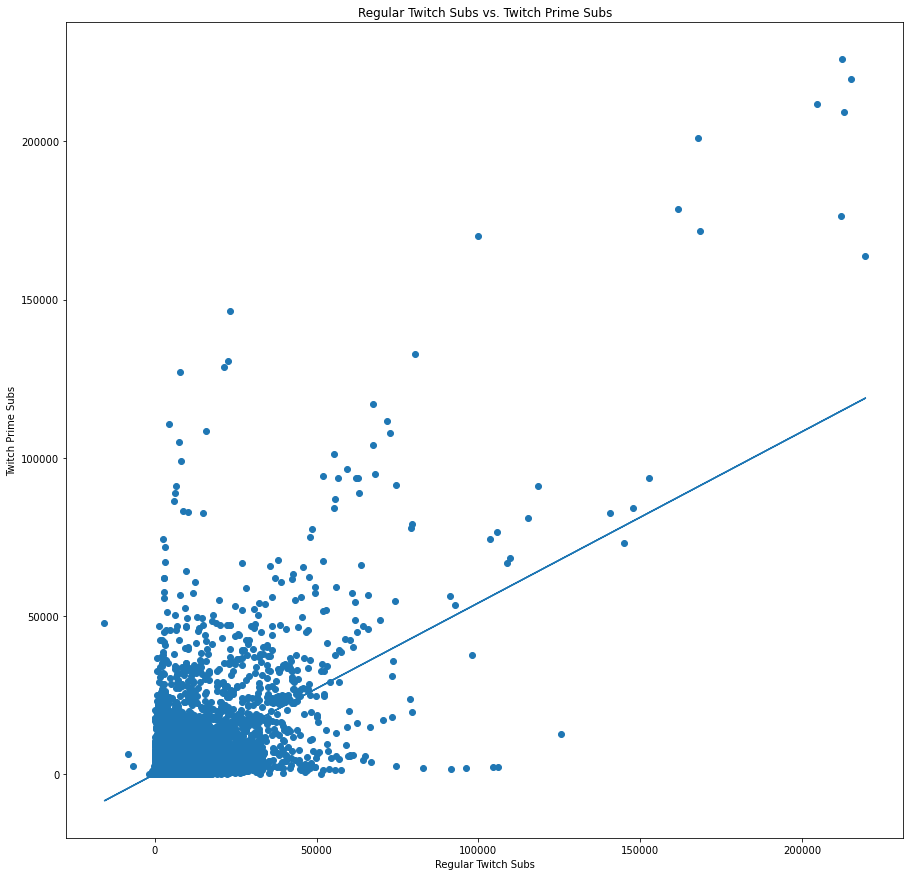

In [11]:
plt.figure(figsize=(15,15))
plt.scatter(out.sub_share_gross,out.prime_sub_share_gross)
m,b=np.polyfit(out.sub_share_gross,out.prime_sub_share_gross,1)
print('Linear Regression Model: %sx + %s' % (m, b))
regress = [m*val+b for val in out.sub_share_gross]
plt.plot(out.sub_share_gross,regress)
plt.title('Regular Twitch Subs vs. Twitch Prime Subs')
plt.xlabel('Regular Twitch Subs')
plt.ylabel('Twitch Prime Subs');

As seen above, there is not much of a correlation between the two. This is why our regressors will fail to predict accurately! While I thought we would be able to come up with a solution as to how much revenue prime subs generate given regular sub revenue, I was wrong. The reason I mention this is that due to the size of the platform nowadays, becoming a big streamer is much like becoming an internet celebrity; there is a factor of luck to it. While it is nice to be able to statistically anaylze the success of streamers, it is worth noting that a bigger streamer's success cannot entirely be explained.

## Conclusions

Based on what we have found, the chances of you being a "successful" streamer are pretty slim. The platform has become very saturated with users that all want to be able to do the same thing. Especially with video games still on the rise and gaining more popularity, it is hard to compete against everyone. We saw that the average streamer is going to really only make a miniscule amount of money for the year, as well as below a single percent chance that you make above $10,000. But don't let this disencourage you! While you may not have the best odds of being up there with xQC or Lirik, there is always a chance. Just like I stated above, there is an incalculable factor of luck to becoming a successful streamer. If you believe that you are dedicated and have what it takes to breakout of the lesser majority of streamers, then go! If live-streaming is your passion, then get out there, and join the top crew! No one at the top made it without at least trying, and while it might be difficult to get there, you could be a successful streamer as a side-gig. Maybe you'll even get some of those elusive sponsorships. Either way, success is truly defined by you.